# Notebook 7: Data visualization with Seaborn

Here we will see how Seaborn can greatly speed up the visualization of data. Again we will work with Fisher's Iris dataset. 

In [1]:
# Load the standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set seaborn style
sns.set_style('ticks')

In [3]:
# Load Iris dataset
df = sns.load_dataset('iris')
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Suppose we want to make a bar chart showing the mean sepal length of each species. What do we need to do using standard Matplotlib?

In [4]:
# First we need to get a list of mean values, one for each species
means_df = df.groupby('species').mean()
means_df

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


([<matplotlib.axis.XTick at 0x1a23bca400>,
 <a list of 3 Text xticklabel objects>)

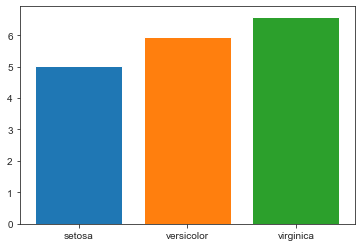

In [5]:
# Get the heights
heights = means_df.loc[:,'sepal_length']

# Set the positions
xs = [0,1,2]

# Set the colors
colors = ['C0','C1','C2']
 
# Plot
plt.bar(x=xs, height=heights, color=colors)
    
# And set xticks and labels
plt.xticks(xs, means_df.index)

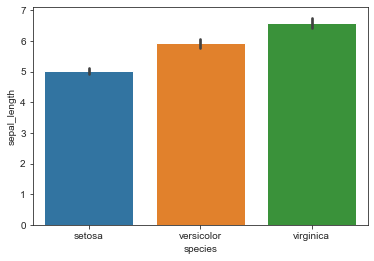

In [6]:
# Creating this plot is far easier with seaborn
sns.barplot(data=df, y="sepal_length", x="species")

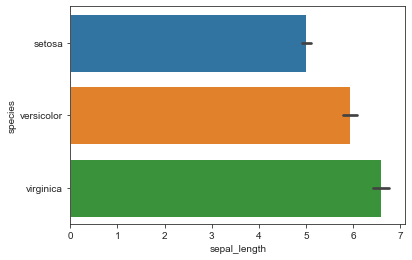

In [7]:
# Make bar chart horizontal by switching x <-> y
sns.barplot(data=df, x="sepal_length", y="species")

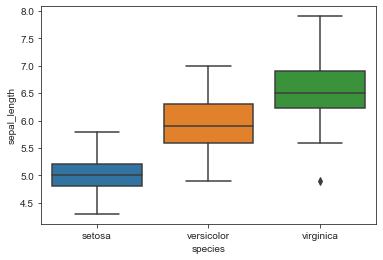

In [8]:
# Create a box plot
sns.boxplot(data=df, y="sepal_length", x="species")

# Box plots are a bit strange
#   Middle line = median
#   Box = interquartile range (IQR)
#   Bottom stem = 1st quartile - 1.5*IQR
#   Top stem = 3rd quartile + 1.5*IQR
#   Dots = outside stems = "outliers"

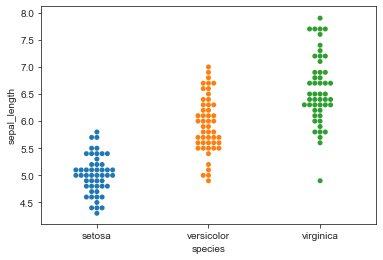

In [9]:
# Create a swarm plot
sns.swarmplot(data=df, y="sepal_length", x="species")

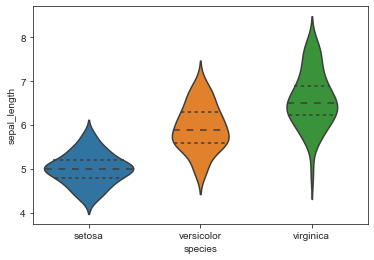

In [10]:
# Violin plot
sns.violinplot(data=df, y="sepal_length", x="species", inner="quartile")
# Try inner = None, "box","quartile", "stick"

In [13]:
# If we want to compare different lengths, we need to "melt" the data frame
melt_df = df.melt(id_vars="species")
melt_df.head(10)

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
5,setosa,sepal_length,5.4
6,setosa,sepal_length,4.6
7,setosa,sepal_length,5.0
8,setosa,sepal_length,4.4
9,setosa,sepal_length,4.9


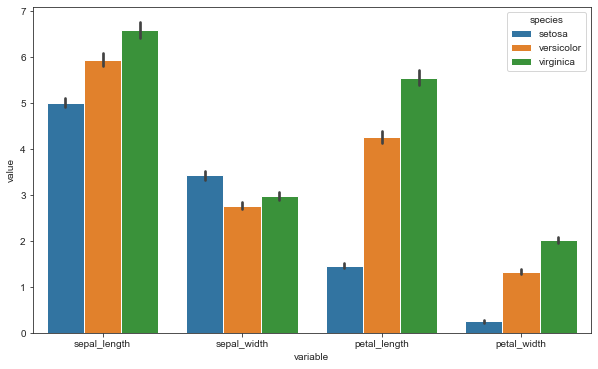

In [12]:
# Separate by both species and variable
plt.figure(figsize=[10,6])
sns.barplot(data=melt_df, x="variable", y="value", hue="species")

In [ ]:
# Show a scatter plot with different species in different hues
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

In [ ]:
### Create a multi-panel figure

# We need the "gridspec" functionality of matplotlib
import matplotlib.gridspec as gridspec

# Create a gridspec object. This will tell matplotlib where to position Axes
gs = gridspec.GridSpec(1, 3)

# Create a figure
fig = plt.figure(figsize=[10,5])

# Create an Axes spanning two columns
ax = plt.subplot(gs[0, 0:2])

# Draw a barplot on this Axes
sns.barplot(data=melt_df, x="variable", y="value", hue="species", ax=ax)
ax.set_title('Bar chart')

# Create an Axes in the third column
ax = plt.subplot(gs[0, 2])

# Draw a scatterplot on this Axes
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
ax.set_title('Scatter plot')

# Add panel labes. Note that x and y are in Figure coordinates, not Axes coordinates
t = fig.text(x=.01, y=.99, s='(A)', fontsize=20, horizontalalignment="left", verticalalignment="top")
fig.text(x=.66, y=.99, s='(B)', fontsize=20, horizontalalignment="left", verticalalignment="top")

# Adjust plot positions
plt.tight_layout(pad=2)

# Save figure
file_name ='7_seaborn_1.pdf' 
plt.savefig(file_name)

# Open figure in Preview
!open $file_name

Seaborn is particularly good for data exploration, i.e., quickly surveying the structure of your data by making lots and lots of plots.

In [ ]:
# Plot all pairwise variables against each other
sns.pairplot(data=df, hue="species")